In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [58]:
# df = pd.read_csv("spam.csv", encoding = 'latin-1')
# or
df = pd.read_csv("https://raw.githubusercontent.com/imagineacreativeusername/oibsip-taskno-2/main/spam.csv", encoding = 'latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [59]:
df = df.iloc[:,:2]
df.columns = ['Label', 'Message']
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


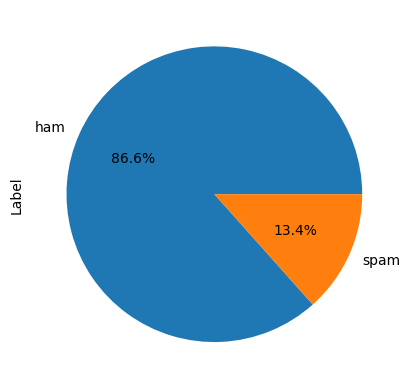

In [60]:
pd.value_counts(df.Label).plot.pie(autopct = '%1.1f%%')
plt.show()

In [61]:
train_set, test_set, train_label, test_label = train_test_split(df, df['Label'], test_size = 0.25)

In [62]:
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set.Message)

# preparing for training set
x_train_df = countvect.transform(train_set.Message)

# preparing for test set
x_test_df = countvect.transform(test_set.Message)

In [ ]:
model = MultinomialNB()
model.fit(x_train_df, train_set.Label)

accuracy = 98.42067480258436


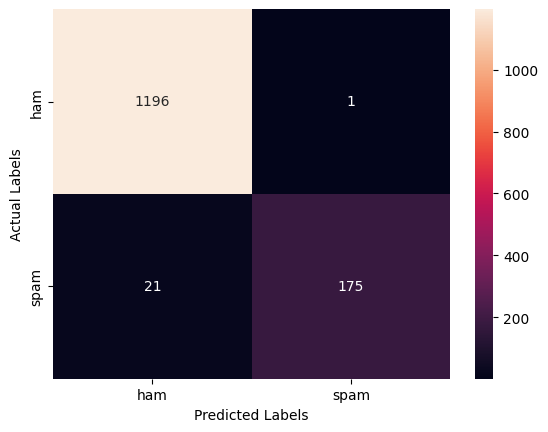

In [75]:
predicted = model.predict(x_test_df)

accuracy = accuracy_score(test_set.Label, predicted)
print("accuracy =", accuracy * 100)

sns.heatmap(confusion_matrix(test_set.Label, predicted), annot=True, fmt='d', xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()